In [26]:
!pip install pyhrv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 13.4 MB/s eta 0:00:00


In [71]:
import biosppy
import numpy as np
import pyhrv.tools as tools
from opensignalsreader import OpenSignalsReader

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy.signal as signal
from math import log10
from opensignalsreader import OpenSignalsReader
import statistics

import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
from matplotlib.patches import Ellipse
from scipy import interpolate
from scipy.stats import zscore


In [72]:
import pandas as pd
import pyhrv
import pyhrv.time_domain as td

In [73]:
fs= 1000;
# Ruta al archivo de texto
archivo = '/content/drive/MyDrive/ECG_Signals/Alvaro_reposo.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[100:28199, 5]
# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023
new_data = amplitud * voltaje_por_unidad * 1000  # Conversión a mV

# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(new_data) + 1)
ts=n/fs;

In [74]:
# Analizar el Fourier
voltaje= new_data.to_numpy()
ecg_senal = voltaje
# Periodo de 2ms (0.002s) o frecuencia de 500 Hz
T = 0.002
N = len(ecg_senal)
yf = fft(ecg_senal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

In [75]:
from scipy.signal import freqz, iirdesign, iirfilter, find_peaks, lfilter
# 2. filtro pasa banda
# Sub filtro pasa bajo
b, a = iirfilter(2, 10, btype='lowpass', rs=3, ftype='butter', fs=500)
w, h = freqz(b, a, fs=500)


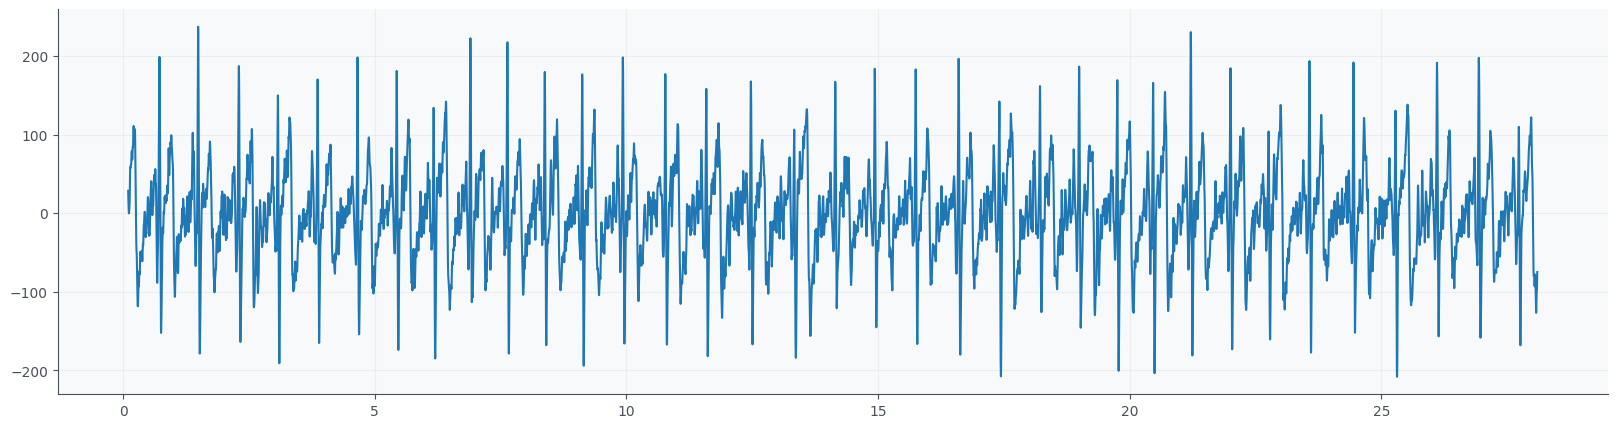

In [76]:
fpb_signal = lfilter(b, a, ecg_senal)
fpb_signal = fpb_signal[100:len(fpb_signal)]
fpb_signal2=fpb_signal-statistics.mean(fpb_signal)
ts2=ts[100:len(ts)]
plt.figure(figsize=(20,5))
plt.plot(ts2,fpb_signal2)
plt.show()

In [77]:
signal, rpeaks = biosppy.signals.ecg.ecg(fpb_signal2, show=False)[1:3]

# Compute NNI
nni = tools.nn_intervals(rpeaks)

print(nni)

[768. 809. 775. 789. 793. 779. 733. 732. 734. 743. 744. 807. 844. 814.
 886. 860. 817. 785. 812. 854. 809. 807. 778. 759. 711. 749. 789. 757.
 812. 875. 834. 825. 832.]


In [82]:
# Compute SDNN parameter
results = td.sdnn(nni)
results2 = td.rmssd(nni)
# Compute SDSD parameter
results3 = td.sdsd(nni)

# Print SDSD
print("El valor de SDSD es:" + str(results3['sdsd']))

# Print RMSSD
print("El valor de RMSDD es:"+str(results2['rmssd']))

# Print SDNN
print("El valor de SDNN es:"+str(results['sdnn']) )


El valor de SDSD es:19.804589725453752
El valor de RMSDD es:35.9339672176619
El valor de SDNN es:43.75709899114899


ANALISIS EN FRECUENCIA

In [79]:
import pyhrv.frequency_domain as fd

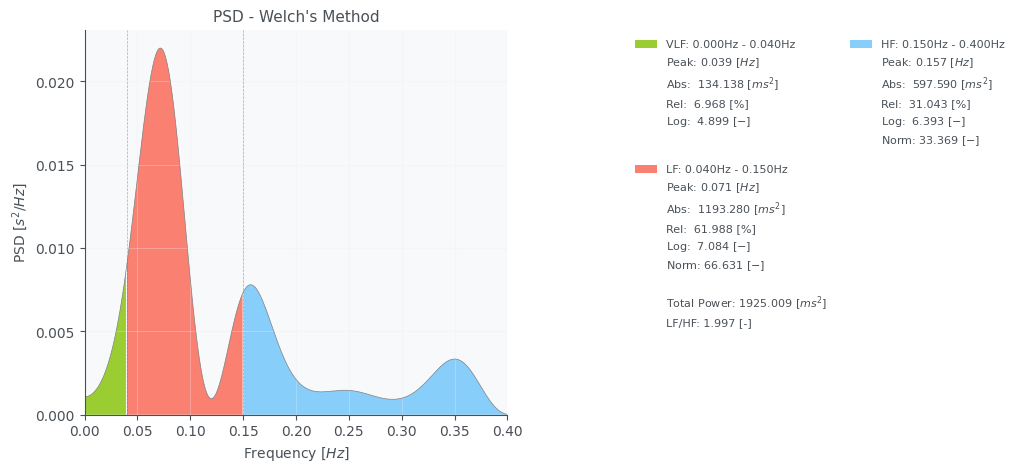

(0.0390625, 0.0712890625, 0.1572265625)


In [80]:
# Compute the PSD and frequency domain parameters using the NNI series
result = fd.welch_psd(nni)

# Access peak frequencies using the key 'fft_peak'
print(result['fft_peak'])

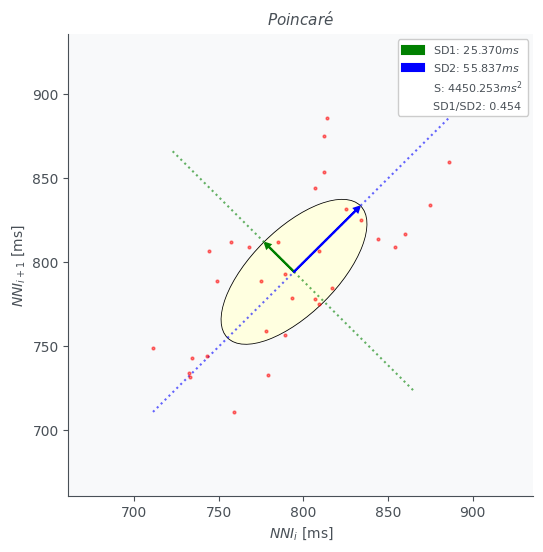

25.36976546994473


In [81]:
import pyhrv.nonlinear as nl
# Compute Poincaré using NNI series
results = nl.poincare(nni)

# Print SD1
print(results['sd1'])